In [2]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
# from tqdm import tqdm_notebook
from itertools import product

import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')


# VECTOR AUTO REGRESSION EQUATION:


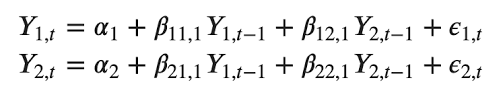

In [15]:
# filepath = r"C:\Users\Admin\Downloads\Sales_Month.xlsx"
macro_data = pd.read_excel('monthly_data.xlsx',parse_dates=['Year'],index_col='Year')
macro_data.dropna(inplace=True)
print(macro_data.shape)  # (123, 8)
macro_data.head()

(34, 4)


,Competitor_Quantity,Competitor_Sales,Company_Quantity,Company_Sales
Year,,,,
2021-01-01,1704955,1.050416e+06,281.10,26.852712
2021-02-01,710321,5.805178e+05,117.30,14.840290
2021-03-01,2448896,1.029155e+06,336.60,26.309198
2021-04-01,2866085,1.829839e+06,152.53,8.797044
2021-05-01,4962707,2.740062e+06,264.16,13.172990


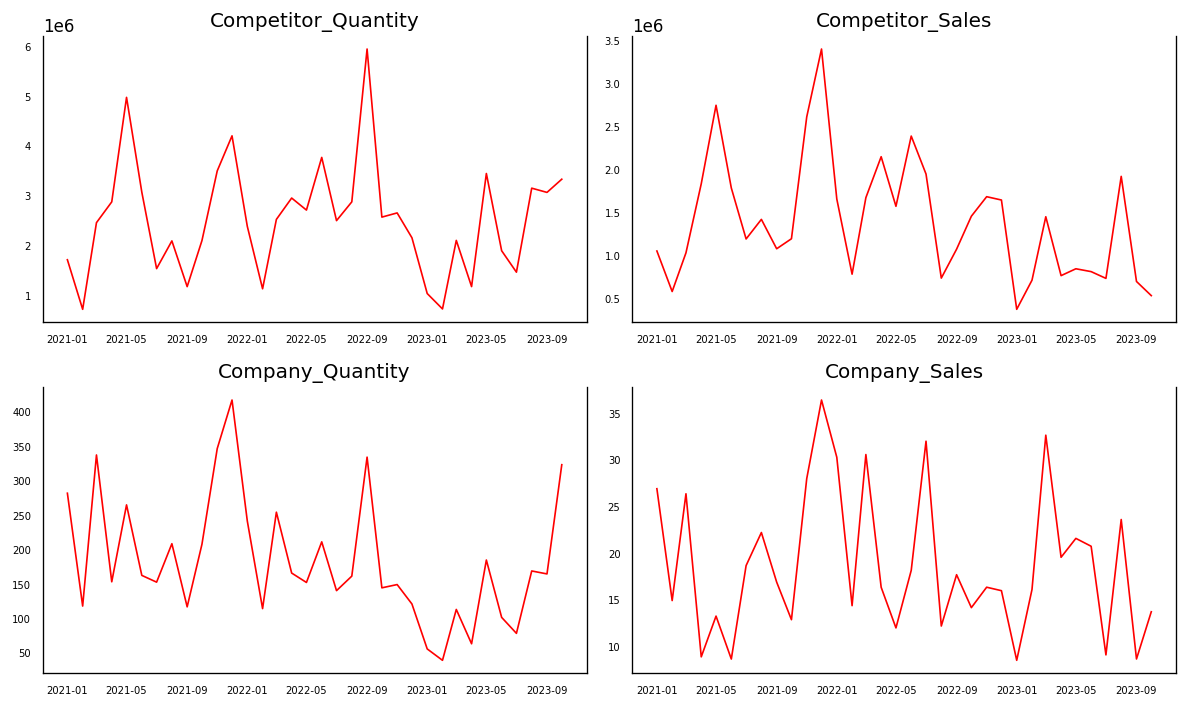

In [16]:
fig, axes = plt.subplots(nrows=2, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = macro_data[macro_data.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(macro_data.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [17]:
ad_fuller_result_1 = adfuller(macro_data['Competitor_Quantity'].diff()[1:])

print('Compe_Quantity')
print(f'ADF Statistic: {ad_fuller_result_1[0]}')
print(f'p-value: {ad_fuller_result_1[1]}')

print('\n---------------------\n')

ad_fuller_result_2 = adfuller(macro_data['Competitor_Sales'].diff()[1:])

print('Compe_Sales')
print(f'ADF Statistic: {ad_fuller_result_2[0]}')
print(f'p-value: {ad_fuller_result_2[1]}')

print('\n---------------------\n')

ad_fuller_result_3 = adfuller(macro_data['Company_Quantity'].diff()[1:])

print('Quantity')
print(f'ADF Statistic: {ad_fuller_result_3[0]}')
print(f'p-value: {ad_fuller_result_3[1]}')

print('\n---------------------\n')

ad_fuller_result_4 = adfuller(macro_data['Company_Sales'].diff()[1:])

print('Sales')
print(f'ADF Statistic: {ad_fuller_result_4[0]}')
print(f'p-value: {ad_fuller_result_4[1]}')

Compe_Quantity
ADF Statistic: -5.583795515723244
p-value: 1.3775163562123694e-06

---------------------

Compe_Sales
ADF Statistic: -1.4896912291644036
p-value: 0.538604637093673

---------------------

Quantity
ADF Statistic: -5.3229069418555115
p-value: 4.90805513275147e-06

---------------------

Sales
ADF Statistic: -6.2372757611646925
p-value: 4.791475546847122e-08


In [18]:
print('Company_Sales causes Company_Quantity?\n')
print('------------------')
granger_1 = grangercausalitytests(macro_data[['Company_Quantity', 'Company_Sales']], 8)

print('\nCompany_Quantity causes Company_Sales?\n')
print('------------------')
granger_2 = grangercausalitytests(macro_data[['Company_Sales', 'Company_Quantity']], 8)

print('Competitor_Sales causes Competitor_Quantity?\n')
print('------------------')
granger_3 = grangercausalitytests(macro_data[['Competitor_Quantity', 'Competitor_Sales']], 8)

print('\nCompetitor_Quantity causes Competitor_Sales?\n')
print('------------------')
granger_4 = grangercausalitytests(macro_data[['Competitor_Sales', 'Competitor_Quantity']], 8)


Company_Sales causes Company_Quantity?

------------------

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.8731  , p=0.0584  , df_denom=30, df_num=1
ssr based chi2 test:   chi2=4.2604  , p=0.0390  , df=1
likelihood ratio test: chi2=4.0070  , p=0.0453  , df=1
parameter F test:         F=3.8731  , p=0.0584  , df_denom=30, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.9258  , p=0.0708  , df_denom=27, df_num=2
ssr based chi2 test:   chi2=6.9352  , p=0.0312  , df=2
likelihood ratio test: chi2=6.2772  , p=0.0433  , df=2
parameter F test:         F=2.9258  , p=0.0708  , df_denom=27, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.1630  , p=0.1187  , df_denom=24, df_num=3
ssr based chi2 test:   chi2=8.3816  , p=0.0387  , df=3
likelihood ratio test: chi2=7.4187  , p=0.0597  , df=3
parameter F test:         F=2.1630  , p=0.1187  , df_denom=24, df_num=3

Granger Causality
number of lags (no zer

In [19]:
macro_data = macro_data[['Company_Quantity','Company_Sales','Competitor_Quantity','Competitor_Sales']]
#macro1_data = macro_data[['Competitor_Quantity','Competitor_Sales']]
print(macro_data.shape)

(34, 4)


In [20]:
train_df=macro_data[:int(0.8*(len(macro_data)))]
test_df=macro_data[int(0.8*(len(macro_data))):]

In [21]:
print(test_df.shape)

(7, 4)


In [22]:
model = VAR(train_df.diff()[1:])

# Sort_order

In [28]:
sorted_order=model.select_order(maxlags=4) # Max lag
print(sorted_order.summary())


 VAR Order Selection (* highlights the minimums) 
      AIC         BIC         FPE         HQIC   
-------------------------------------------------
0       66.58      66.78*   8.214e+28       66.62
1       67.15       68.14   1.499e+29       67.38
2       66.33       68.11   7.835e+28       66.75
3       65.73       68.31   7.098e+28       66.33
4      63.86*       67.23  4.154e+28*      64.66*
-------------------------------------------------


# Fit

In [30]:
var_model = VARMAX(train_df, order=(4,0),enforce_stationarity= True)
fitted_model = var_model.fit(disp=False)
print(fitted_model.summary())

                                                          Statespace Model Results                                                          
Dep. Variable:     ['Company_Quantity', 'Company_Sales', 'Competitor_Quantity', 'Competitor_Sales']   No. Observations:                   27
Model:                                                                                       VAR(4)   Log Likelihood                -983.495
                                                                                        + intercept   AIC                           2122.990
Date:                                                                              Mon, 22 Jan 2024   BIC                           2224.066
Time:                                                                                      18:30:51   HQIC                          2153.045
Sample:                                                                                  01-01-2021                                         
             

In [40]:
n_forecast = 8
predict = fitted_model.get_prediction(start=len(train_df),end=len(train_df) + n_forecast-1)

predictions=predict.predicted_mean

In [41]:
predictions.columns=['Company_Quantity_pred','Company_Sales_pred','Competitor_Quantity_pred','Competitor_Sale_pred']
predictions

# predictions.columns=['Competitor_Quantity_pred','Competitor_Sales_pred']
# predictions

,Company_Quantity_pred,Company_Sales_pred,Competitor_Quantity_pred,Competitor_Sale_pred
2023-04-01,67.968420,11.637752,2.699697e+06,2.134015e+04
2023-05-01,143.913755,-0.753349,4.614818e+06,-5.015164e+05
2023-06-01,206.497167,9.644949,5.125312e+06,1.333126e+06
2023-07-01,135.439520,13.433397,3.683308e+06,1.687492e+06
2023-08-01,57.194234,0.084075,2.501037e+06,5.836762e+05
2023-09-01,115.303236,5.351778,2.260305e+06,3.061953e+05
2023-10-01,96.950966,14.830766,1.371930e+06,1.119221e+06
2023-11-01,137.999583,19.010957,1.781278e+06,1.260119e+06


In [42]:
test_vs_pred=pd.concat([test_df,predictions],axis=1)

<Axes: >

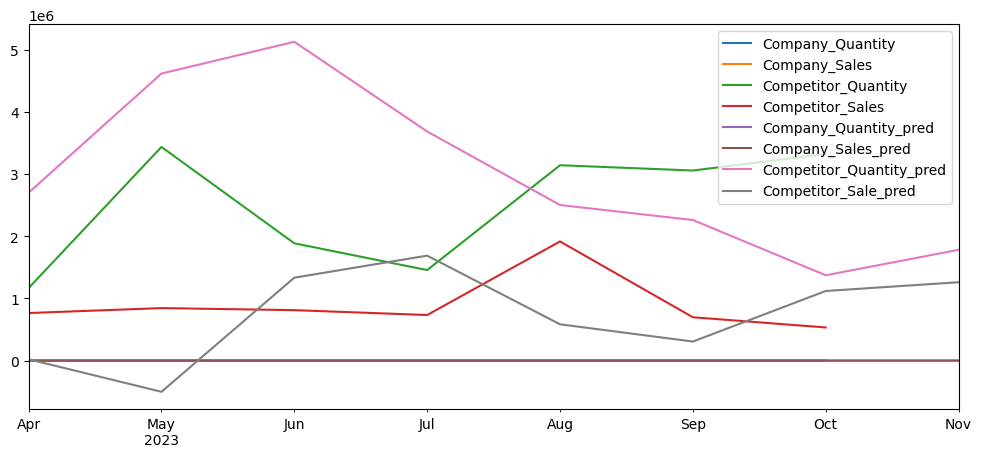

In [43]:
test_vs_pred.plot(figsize=(12,5))

In [44]:
from sklearn.metrics import mean_squared_error
import math 
from statistics import mean

rmse_quantity=math.sqrt(mean_squared_error(predictions['Company_Quantity_pred'],test_df['Company_Quantity']))
print('Mean value of Company_Quantity is : {}. Root Mean Squared Error is :{}'.format(mean(test_df['Company_Quantity']),rmse_quantity))

rmse_sales=math.sqrt(mean_squared_error(predictions['Company_Sales_pred'],test_df['Company_Sales']))
print('Mean value of Company_Sales is : {}. Root Mean Squared Error is :{}'.format(mean(test_df['Company_Sales']),rmse_sales))

# # For Quantity
# rmse_quantity = math.sqrt(mean_squared_error(predictions['Competitor_Quantity_pred'], test_df['Competitor_Quantity']))
# print('Mean value of Competitor_Quantity is: {}. Root Mean Squared Error is: {}'.format(mean(test_df['Competitor_Quantity']), rmse_quantity))

# # For Sales
# rmse_sales = math.sqrt(mean_squared_error(predictions['Competitor_Sales_pred'], test_df['Competitor_Sales']))
# print('Mean value of Competitor_Sales is: {}. Root Mean Squared Error is: {}'.format(mean(test_df['Competitor_Sales']), rmse_sales))

ValueError: Found input variables with inconsistent numbers of samples: [8, 7]